# Options Pricing Model using Black Scholes Model

This project will focus on implementation of the Black Scholes option pricing model for European call and put options.The model is widely recognised in quantitative finance and works by calculating theoretical option prices based on some various financial parameters. The formula has parameters such as current stock price, strike price, time to expiration, volatility, interest rate. The implementation has key functions for call and put options. This project aims to showcase the application of mathematical finance concepts in programming.

Let's start by defining the Black Scholes Model : \
A mathematical equation that estimates value of derivatives based on other investment instruments that take into account the impact of time and risk factors

#### Black Scholes Assumptions    

- No dividend paid out during time of option.
- Random markets.
- No transactional costs for buing option.
- Returns of asset are noramlly distributed.
- Volatility and risk free rate are known and kept constant.
- Option is only exercised at expiration (European).

#### Black Scholes Formula

$C = S N(d_1) - Ke^{-rt} N(d_2)$ \
where, \
\
$d_1 = \frac{\ln\left(\frac{S}{K}\right) + \left(r + \frac{\sigma^2}{2}\right)T}{\sigma \sqrt{T}}$\
\
$d_2 = d_1 - \sigma \sqrt{T}$

$C = $ Call option price 
\
$S = $ Current stock price 
\
$K = $ Strike Price 
\
$r = $ Risk free rate 
\
$T = $ Time to maturity 
\
$N = $ Normal Distribution 

# Libraries required

In [225]:
###########################      Import Libraries Needed         ######################
import numpy as np
from scipy.stats import norm
import pandas_datareader as web
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from py_vollib.black_scholes import black_scholes as bs
from py_vollib.black_scholes.greeks.analytical import delta, gamma, vega, theta, rho
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset


# The Heart of the Program 

In [226]:
class StockDataProcessor:
    def __init__(self, ticker, start_date, end_date):
        self.ticker = ticker
        self.start_date = start_date
        self.end_date = end_date

        


    def get_stock_data(self): #function to get historical stock data from Yahoo Finance but only for ADJ Close prices
        """
        Get historical stock data from Yahoo Finance.

        Returns:
        pandas.Series: Series containing 'Adj Close' prices
        """
        df = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        df = df.reset_index()  # Resetting index to integer-based index
        stock_prices = df['Adj Close']
        #print(df.columns)
        return stock_prices

    def stock_data_price(self): #function to get everybit of  historical stock data from Yahoo Finance 
        """
        Get historical stock data from Yahoo Finance.

        Returns:
        pandas.Series: Series containing 'Adj Close' prices adn "Date"
        """
        df = yf.download(self.ticker, start=self.start_date, end=self.end_date)
        df = df.reset_index()  # Resetting index to integer-based index
        stock_prices = df
        return stock_prices

    def plot_stock_data_date_vs_price(self): #function to plot historical stock data (Date vs Price).
        """
        Plot historical stock data (Date vs Adj Close).
        """
        stock_data = self.stock_data_price()

        plt.figure(figsize=(10, 6))
        plt.plot(stock_data['Date'], stock_data['Adj Close'], label='Adj Close Price', color='blue')
        plt.title(f"{self.ticker} Stock Price Over Time")
        plt.xlabel('Date')
        plt.ylabel('Adj Close Price')
        plt.legend()
        plt.show()

    

    def plot_candlestick_chart(self): #function to plot candlestick chart.
        stock_data = self.stock_data_price()

        # Convert 'Date' to matplotlib dates
        stock_data['Date'] = mdates.date2num(stock_data['Date'])

        # Plotting the candlestick chart
        fig, ax = plt.subplots(figsize=(10, 6))
        for index, row in stock_data.iterrows():
            color = 'green' if row['Close'] >= row['Open'] else 'red'
            ax.plot([row['Date'], row['Date']], [row['Low'], row['High']], color=color, linewidth=2)
            ax.plot([row['Date']], [row['Open']], marker='o', color=color, markersize=8)
            ax.plot([row['Date']], [row['Close']], marker='o', color=color, markersize=8)

        # Customize the appearance
        ax.xaxis_date()
        ax.xaxis.set_major_locator(mdates.MonthLocator())
        ax.xaxis.set_major_formatter(mdates.DateFormatter('%b %d'))

        plt.title(f"{self.ticker} Candlestick Chart")
        plt.xlabel('Date')
        plt.ylabel('Price')
        plt.show()

    def get_latest_stock_price(self): #function to get the latest stock price from Yahoo Finance. (ONLY LAST PRICE FROM USER SPECIFIED DATE.)
        """
        Get the latest stock price from Yahoo Finance.

        Returns:
        float: Latest 'Adj Close' stock price
        """
        stock_prices = self.get_stock_data()
        latest_stock_price = stock_prices.iloc[-1]
        return latest_stock_price

    def get_volatility(self): #function to calculate historical volatility based on past stock prices.
        """
        Calculate historical volatility based on past stock prices.

        Returns:
        float: Historical volatility
        """
        stock_prices = self.get_stock_data()
        historical_returns = np.log(stock_prices / stock_prices.shift(1))
        volatility = historical_returns.std() * np.sqrt(252)  # Adjust for annualization
        return volatility

    
        
    
class OptionPricer: #Class to calculate option prices.
    
    def __init__(self, S, K, T, r, sigma): #Constructor
        self.S = S
        self.K = K
        self.T = T
        self.r = r
        self.sigma = sigma




    def black_scholes(self,option_type): #function to calculate Black-Scholes European call option price.
        """"
        Calculate the Black-Scholes European call option price.
    
        Parameters:
        S : current stock price
        K : stock price
        T : time to maturity    
        r : risk-free rate
        sigma : volatility
        """
    
        d1 = (np.log(self.S / self.K) + (self.r + 0.5 * self.sigma ** 2) * self.T) / (self.sigma * np.sqrt(self.T))
        d2 = d1 - self.sigma * np.sqrt(self.T)
        
        try:
            if option_type == 'c':
                price =  self.S * norm.cdf(d1,0,1) - self.K * np.exp(-self.r * self.T) * norm.cdf(d2,0,1)
            elif option_type == 'p':
                price =  self.K * np.exp(-self.r * self.T) * norm.cdf(-d2,0,1) - self.S * norm.cdf(-d1,0,1)
            return price
        except:
            print('Error: invalid option type')
    



# Plots

[*********************100%***********************]  1 of 1 completed


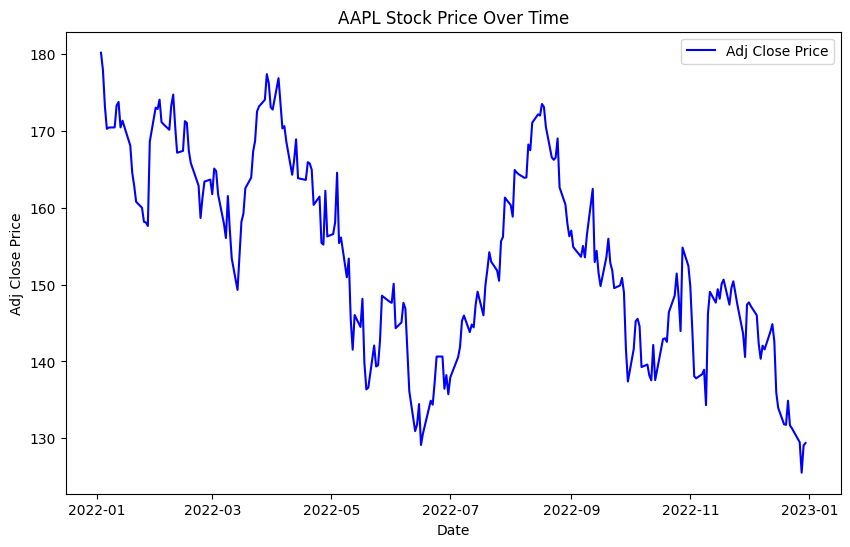

[*********************100%***********************]  1 of 1 completed


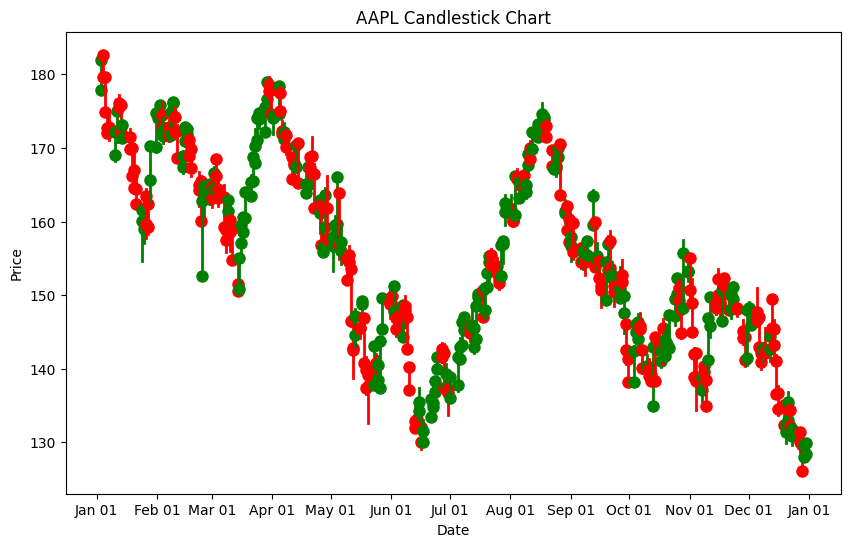

In [227]:
#Let's plot some graphs to see what the Apple Stock data looks like.
stockDataProcessor.plot_stock_data_date_vs_price() #plot the date vs price graph
stockDataProcessor.plot_candlestick_chart() #plot the candlestick chart

# Option Price

In [229]:

stockDataProcessor = StockDataProcessor('AAPL', '2022-01-01', '2022-12-31')
stock_prices = stockDataProcessor.get_latest_stock_price()
stock_price_volatility = stockDataProcessor.get_volatility()

option_pricer = OptionPricer(stock_prices, 40,244/365,0.01,stock_price_volatility)

x = option_pricer.black_scholes('c')

#It came down this, this is where we calcualte the option price, in the program we have used Object oriented programming,
#which means we can just create instances of the class and call the method for different tickers
#remeber this part we used Apple stock price ranging from 2022/01/01 to 2022/12/31 
# User woudl be able to input their own ticker and date range as well as strike price, time to maturity and risk price as well as if they
#wanted to they could use their own stockprice as well as volatility

x = str(round(x, 2))
print("Option Price using Black-Scholes formula: " + x)



[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
Option Price using Black-Scholes formula: 89.64
